In [1]:
# Run
import matplotlib.pyplot as plt
import pandas as pd
import time
from matplotlib.ticker import FuncFormatter
import numpy as np
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import os, sys
sys.path.append('..')
from field import read_MS_txt, read_data, read_csv, read_csv_BC, plot_overview, plot_PAH_ACSM, plot_ACSM_BC

In [2]:
# Run
parent_path = '../../../' # How many folders do you have to go back before you are out of the P: drive?

# mass spectra
path_MS = 'L:/PG-Nanoteknologi/PROJEKTER/EPA-asfaltprojekt/On-line PAH Projekt KU/ACSM/txt/mass_spec/'

MS = read_MS_txt(path_MS, parent_path)
display(MS.keys())
display(MS['Trafic_before'].keys())

FileNotFoundError: [WinError 3] Den angivne sti blev ikke fundet: 'L:/PG-Nanoteknologi/PROJEKTER/EPA-asfaltprojekt/On-line PAH Projekt KU/ACSM/txt/mass_spec/'

In [ ]:
# ACSM
path_vesterbrogade = 'L:/PG-Nanoteknologi/Data/ACSM/CSV data/EPA_Vesterbrogade_2023/' # Path to data located on L: drive
path_indiakaj = 'L:/PG-Nanoteknologi/Data/ACSM/CSV data/EPA_Indiakaj_2023/' # Path to data located on L: drive
path_greve = 'L:/PG-Nanoteknologi/Data/ACSM/CSV data/EPA_Greve_2023/' # Path to data located on L: drive

vesterbrogade = read_csv(path_vesterbrogade, parent_path)
indiakaj = read_data(path_indiakaj, parent_path)
greve = read_csv(path_greve, parent_path)

In [ ]:
# Black carbon
path_BC_vesterbrogade = 'L:/PG-Nanoteknologi/Data/MA200/Raw data/Vesterbro_asphalt 2023/'
BC_station_vesterbrogade = ['MA200-0353']
path_BC_indiakaj = 'L:/PG-Nanoteknologi/Data/MA200/Raw data/Indiakaj_asphalt 2022/'
BC_station_indiakaj = ['S0052', 'S0055']
path_BC_greve = 'L:/PG-Nanoteknologi/Data/MA200/Raw data/Greve_asphalt_2023/'
BC_station_greve = ['MA200-0285']

BC_vesterbrogade = read_csv_BC(path_BC_vesterbrogade, parent_path, BC_station_vesterbrogade)
BC_indiakaj = read_csv_BC(path_BC_indiakaj, parent_path, BC_station_indiakaj)
BC_greve = read_csv_BC(path_BC_greve, parent_path, BC_station_greve)

print('Vesterbrogade: ', BC_vesterbrogade.keys())
print('Indiakaj: ', BC_indiakaj.keys())
print('Greve: ', BC_greve.keys())

In [ ]:
# Run
def plot_MS(ax, df):
    df['mass'] = df['mass'].astype(str)
    x = np.arange(len(df['mass']))
    width = 0.25
    multiplier = 0

    for key in df.keys()[1:]:
        offset = width * multiplier
        ax.plot(x + offset, df[key], width, label = key)
        multiplier += 1
    
    ax.set_ylabel('Intensity')
    ax.set_title('m/z')
    ax.set_xticks(x + 2*width, df['mass'])
    ax.legend(frameon = False)

In [ ]:
# Run
fig, ax = plt.subplots(figsize = (6.3, 3))

plot_MS(ax, MS['Trafic_before'])

fig.tight_layout()
fig.savefig('Field_data/Trafic_before.png', dpi = 600)
plt.show()

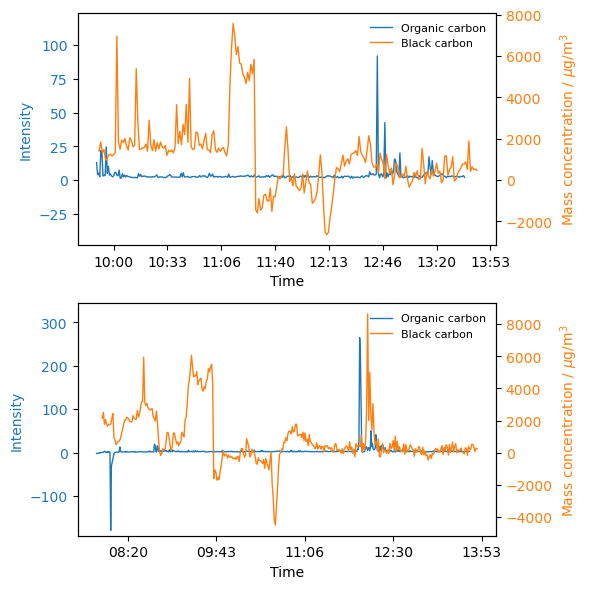

In [3]:
fig, ax = plt.subplots(2, 1, figsize = (6, 6))

plot_ACSM_BC(ax[0], vesterbrogade['EPA-vesterbrogade-120623'], BC_vesterbrogade['230612094700'], 2)
plot_ACSM_BC(ax[1], vesterbrogade['EPA-vesterbrogade-130623'], BC_vesterbrogade['230613075200'][:-2], 1.5)

fig.tight_layout()
fig.savefig('Field_data/vesterbrogade_ACSM_BC.png', dpi = 600)
plt.show()

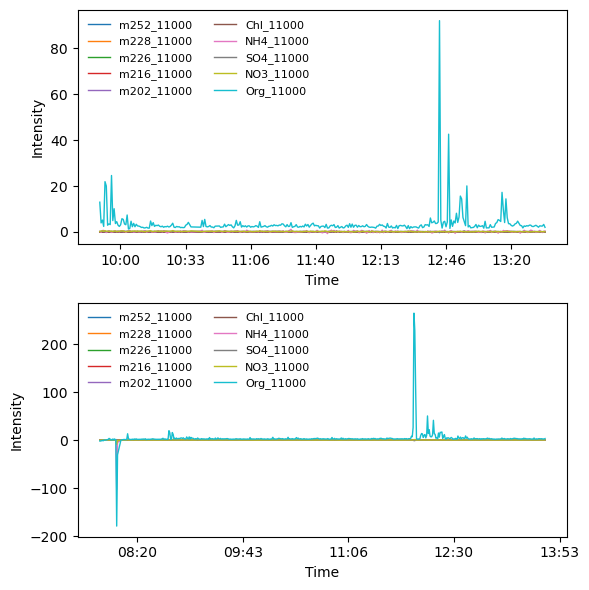

In [4]:
fig, ax = plt.subplots(2, 1, figsize = (6, 6))

plot_overview(ax[0], vesterbrogade['EPA-vesterbrogade-120623'], 2)
plot_overview(ax[1], vesterbrogade['EPA-vesterbrogade-130623'], 2)

fig.tight_layout()
fig.savefig('Field_data/EPA_vesterbrogade.png', dpi = 600)

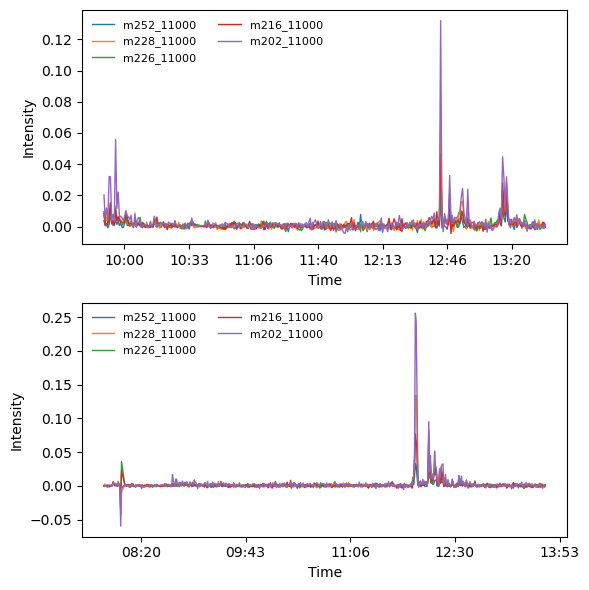

In [5]:
fig, ax = plt.subplots(2, 1, figsize = (6, 6))

plot_PAH_ACSM(ax[0], vesterbrogade['EPA-vesterbrogade-120623'], 2)
plot_PAH_ACSM(ax[1], vesterbrogade['EPA-vesterbrogade-130623'], 2)

fig.tight_layout()
fig.savefig('Field_data/EPA_vesterbrogade_PAH.png', dpi = 600)

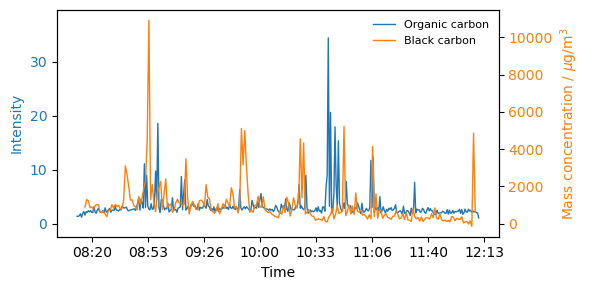

In [6]:
fig, ax = plt.subplots(figsize = (6, 3))

plot_ACSM_BC(ax, indiakaj['EPA-indiakaj-130722'][5:], BC_indiakaj['220713081200'], 15)

fig.tight_layout()
fig.savefig('Field_data/indiakaj_ACSM_BC.png', dpi = 600)
plt.show()

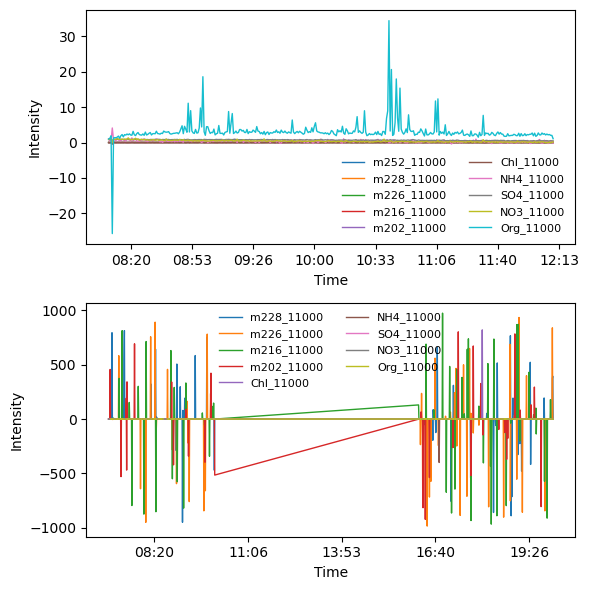

In [7]:
fig, ax = plt.subplots(2, 1, figsize = (6, 6))

plot_overview(ax[0], indiakaj['EPA-indiakaj-130722'], 2)
plot_overview(ax[1], indiakaj['EPA-indiakaj-140722'], 2)

fig.tight_layout()
fig.savefig('Field_data/EPA_indiakaj.png', dpi = 600)

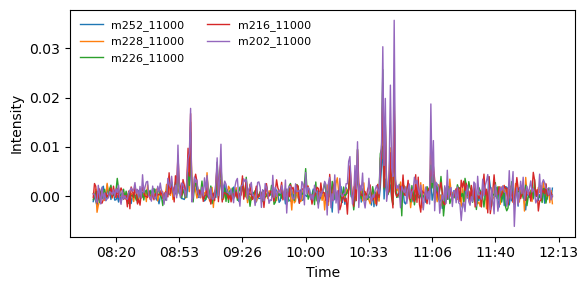

In [8]:
fig, ax = plt.subplots(figsize = (6, 3))

plot_PAH_ACSM(ax, indiakaj['EPA-indiakaj-130722'], 2)

fig.tight_layout()
fig.savefig('Field_data/EPA_indiakaj_PAH.png', dpi = 600)

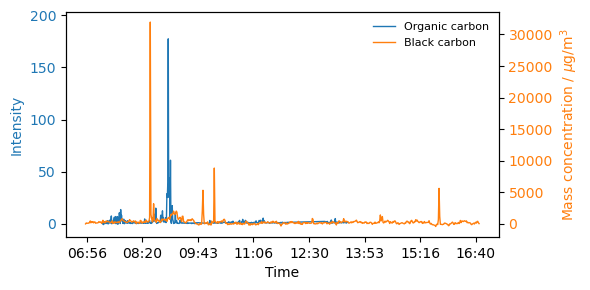

In [9]:
fig, ax = plt.subplots(figsize = (6, 3))

plot_ACSM_BC(ax, greve['EPA-greve-280623'][5:], BC_greve['230628065100'], 15)

fig.tight_layout()
fig.savefig('Field_data/greve_ACSM_BC.png', dpi = 600)
plt.show()

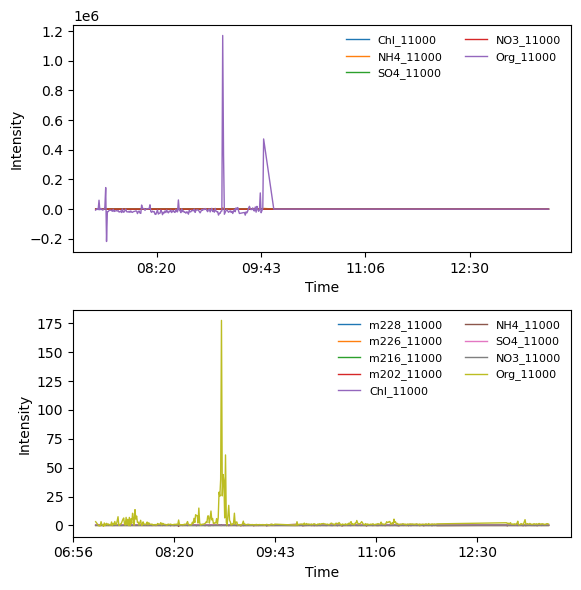

In [10]:
fig, ax = plt.subplots(2, 1, figsize = (6, 6))

plot_overview(ax[0], greve['EPA-greve-270623'], 2)
plot_overview(ax[1], greve['EPA-greve-280623'], 2)

fig.tight_layout()
fig.savefig('Field_data/EPA_greve.png', dpi = 600)

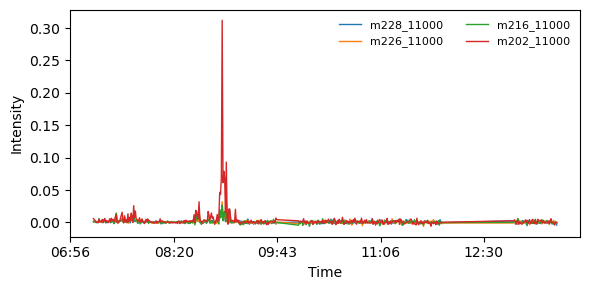

In [11]:
fig, ax = plt.subplots(figsize = (6, 3))

plot_PAH_ACSM(ax, greve['EPA-greve-280623'], 2)

fig.tight_layout()
fig.savefig('Field_data/EPA_greve_PAH.png', dpi = 600)